In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#data generation
observation = 1000
xs=np.random.uniform(low=-10, high=10, size=(observation,1))
zs=np.random.uniform(-10,10, size=(observation,1))
inputs = np.column_stack((xs,zs))
print(inputs.shape)

(1000, 2)


In [4]:
noise = np.random.uniform(-1,1,(observation,1))
targets = 2*xs - 3*zs + 5 + noise
np.savez('TF Intro', input=inputs, targets=targets)
print(targets.shape)

(1000, 1)


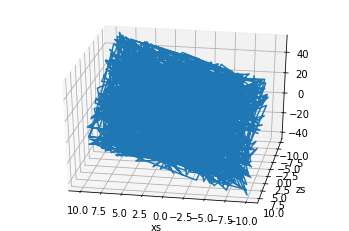

In [5]:
targets = targets.reshape(observation,)
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.plot(xs,zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observation,1)

In [6]:
#initial biases and weight pincked randomly from [-0.1,0.1]
init_range = 0.1
weight = np.random.uniform(-init_range,init_range, size=(2,1))
biases = np.random.uniform(-init_range,init_range,size=1)
print(weight)
print(biases)

[[-0.04735118]
 [-0.04663507]]
[0.04095343]


In [7]:
learning_rate=0.02
#train model

for i in range(100):
    #y=xw+b
    output=np.dot(inputs,weight) + biases
    # deltas record diff. betw. output and target part of update rule
    deltas=output-targets
    #loss fn -l2(lasso)
    loss=np.sum(deltas ** 2)/2/observation
    print(loss)
    #for making algorithm univarsal
    deltas_scaled=deltas/observation
    #weight update 
    weight=weight-learning_rate*np.dot(inputs.T,deltas_scaled)
    #2x1    2x1     scaler               1000x2  1000x1
    #as we know 1000/2 / 1/1000 =        2/1000    
    #update biases
    biases = biases-learning_rate * np.sum(deltas_scaled)

233.32709842713052
34.26773202700758
13.818927360910832
11.354465937772352
10.717177420724726
10.279510170124935
9.876778533299388
9.491773727415778
9.122194199966987
8.76726722482968
8.426396184897381
8.099022838311466
7.7846125458819095
7.4826519909664695
7.192648198305962
6.914127714618047
6.6466358341593965
6.389735856231787
6.143008372219578
5.906050580871874
5.678475630698898
5.459911988407698
5.250002832345986
5.048405469963838
4.8547907783422435
4.66884266687506
4.490257561227241
4.318743907726808
4.1540216973814585
3.99582200874274
3.843886568871472
3.697967331687685
3.557826073016635
3.4232340016698655
3.293971385926317
3.1698271948036836
3.050598753534403
2.936091412683801
2.8261182303701693
2.7204996670680495
2.6190632924963806
2.5216435041130483
2.4280812567562315
2.3382238029911635
2.251924443738405
2.1690422887765206
2.0894420267281513
2.0129937041539763
1.9395725133939017
1.8690585888091384
1.8013368110924834
1.736296619327366
1.6738318304888018
1.6138404660915753
1.556

In [8]:
print(weight,biases)

[[ 1.99636293]
 [-2.99864968]] [4.3626522]


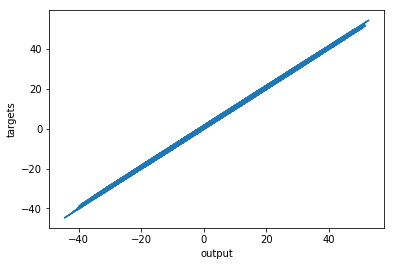

In [9]:
plt.plot(output,targets)
plt.xlabel('output')
plt.ylabel('targets')
plt.show()